In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('D:DATASETS/city_day.csv')


In [2]:
# Filter the data for Delhi
delhi_data = df[df['City'] == 'Delhi']

# Drop missing values
delhi_data = delhi_data.dropna()

# Convert Date column to datetime format
delhi_data['Date'] = pd.to_datetime(delhi_data['Date'])


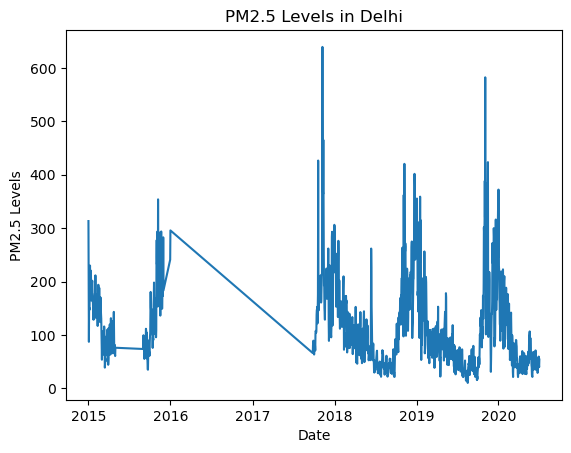

In [3]:
# Plot the PM2.5 values over time
plt.plot(delhi_data['Date'], delhi_data['PM2.5'])
plt.title('PM2.5 Levels in Delhi')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels')
plt.show()


In [4]:
# Make the data stationary
delhi_data['PM2.5_diff'] = delhi_data['PM2.5'].diff()
delhi_data = delhi_data.dropna()


In [5]:
# Build the ARIMA model
model = ARIMA(delhi_data['PM2.5_diff'], order=(1,1,1))
results = model.fit()

# Print the model summary
print(results.summary())


C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             PM2.5_diff   No. Observations:                 1223
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6314.828
Date:                Sat, 15 Apr 2023   AIC                          12635.656
Time:                        20:43:26   BIC                          12650.980
Sample:                             0   HQIC                         12641.423
                               - 1223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0841      0.014     -6.005      0.000      -0.112      -0.057
ma.L1         -0.9999      0.178     -5.615      0.000      -1.349      -0.651
sigma2      1792.6848    319.169      5.617      0.0

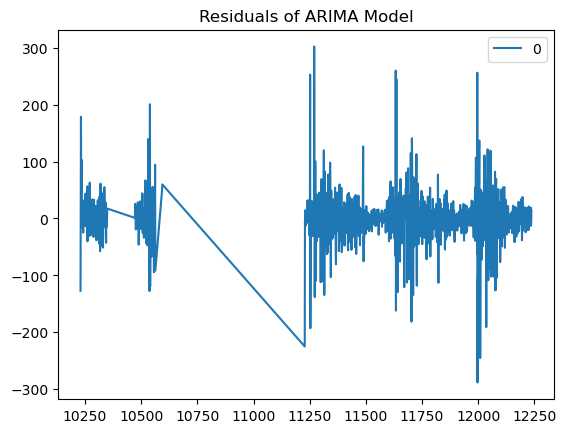

In [6]:
# Visualize the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.title('Residuals of ARIMA Model')
plt.show()


C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


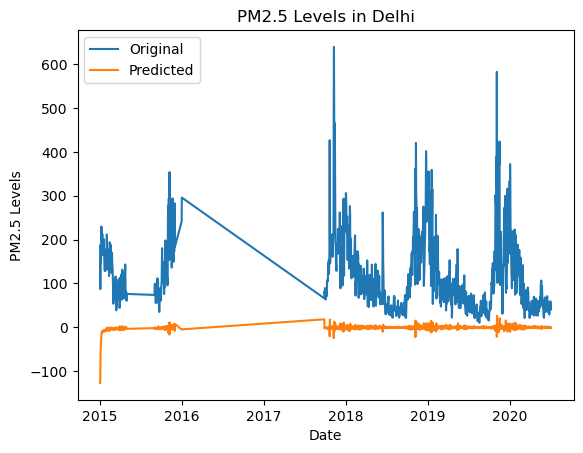

In [7]:
# Make predictions
predictions = results.predict(start=1, end=len(delhi_data), typ='levels')

# Plot the original data and the predicted values
plt.plot(delhi_data['Date'], delhi_data['PM2.5'], label='Original')
plt.plot(delhi_data['Date'], predictions, label='Predicted')
plt.title('PM2.5 Levels in Delhi')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels')
plt.legend()
plt.show()


In [8]:
import itertools

# Define the parameter grid
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Define a list to store the results
results = []

# Iterate over all combinations of p, d, and q
for param in pdq:
    try:
        # Build the ARIMA model
        model = ARIMA(delhi_data['PM2.5'], order=param)
        result = model.fit()
        
        # Calculate the AIC score
        aic = result.aic
        
        # Add the results to the list
        results.append((param, aic))
    except:
        continue

# Find the best set of hyperparameters based on the lowest AIC score
best_param, best_aic = min(results, key=lambda x: x[1])
print('Best Hyperparameters:', best_param)
print('AIC Score:', best_aic)


C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

Best Hyperparameters: (2, 1, 2)
AIC Score: 12472.203418765646


C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karu0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


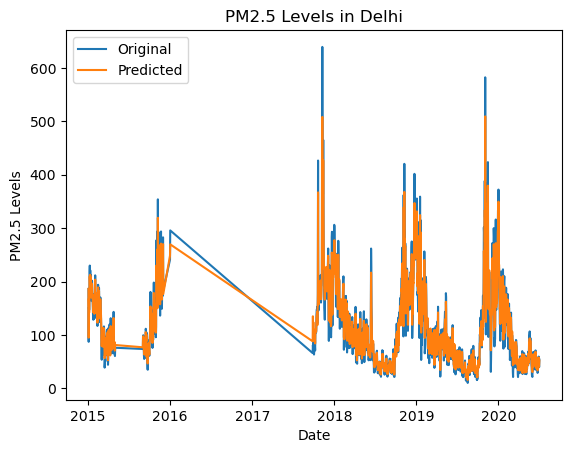

In [9]:
# Build the final ARIMA model
final_model = ARIMA(delhi_data['PM2.5'], order=best_param)
final_results = final_model.fit()

# Make predictions
predictions = final_results.predict(start=1, end=len(delhi_data), typ='levels')

# Plot the original data and the predicted values
plt.plot(delhi_data['Date'], delhi_data['PM2.5'], label='Original')
plt.plot(delhi_data['Date'], predictions, label='Predicted')
plt.title('PM2.5 Levels in Delhi')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels')
plt.legend()
plt.show()
